# Introduction
*Data Analysis is the process of collecting, organizing, and analyzing data to provide insight which can be used to make data driven decisions for businesses.*

According to Google, there are six steps involved in Data Analysis process - **[Ask](#Ask-Phase), [Prepare](#Prepare-Phase), [Process](#Process-Phase), [Analyze](#Analyze-Phase), [Share](#Share-Phase),** and **[Act](#Act-Phase)**. It is important to perform each step very carefully as the accuracy of successive steps depends on the correct execution of the previous steps.

This Case Study is related to a fictional company Cyclisitic. 

**About the Company** <br>
Cyclistic is a successful bike-sharing company started in 2016 in Chicago. They have a network of 5,824 bicycles that are geotracked and locked in to a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic offers three pricing plans -
1. Single-ride passes
2. Full-day passes
3. Annual memberships

Customers who purchase single-ride or full-day passes are referred to as **Casual Riders** and those who purchase annual memberships are **Cyclistic Members**.

According to Cyclistic's finance analysts, annual members are much more profitable than casual riders. Pricing flexibility can help Cyclistic attract more customers, however, Lily Moreno (Director of Marketing) believes maximizing the number of annual members will be a key to future growth. There is a very good chance of converting casual riders into members as Moreno notes that casual members are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

# Ask Phase
We know that Cyclistic's Director of Marketing, Lily Moreno and the team want the casual riders to convert into Cyclistic members. Their goal is to design marketing strategies aimed at converting casual riders into annual members. 
The questions that require to be answered in this context are:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?
Moreno has assigned the team to answer the first question: How do annual members and casual riders use Cyclistic bikes differently?

**Business Task:** How do annual members and casual riders use Cyclistic bikes differently?

# Prepare phase
The data is located in [cloud](https://divvy-tripdata.s3.amazonaws.com/index.html), can be downloaded and used for analysis purposes under this [license](https://ride.divvybikes.com/data-license-agreement). This data is present in form of `.csv` files and is stored in `yyyymm-divvy-tripdata.zip` folder. 

The data has been made available from Lyft Bikes and Scooters, LLC who operate the Divvy bicycle sharing service. They collected this information first hand from their bikes which operate in Chicago. We have downloaded the same data and uploaded to the `trips-data` folder and each month's data is in a subfolder named `yyyymm-divvy-tripdata` as `yyyymm-tripdata.csv`.

The data used in this study is from December 2021 (*2021/12*) to November 2022 (*2022/11*), i.e., the previous 12 months. All the information is consistent across the sheets for different months. The sheets tell us information about each trip's - 
1. Ride ID
2. Type of Bike (rideable type)
3. Start and End times
4. Start and End Station name, ID, latitude and longitude
5. Member Type (Casual or Member)
 
Sorting and filtering the data available in sheets, we see that the data for start and end station name, ID, latitude and longitude is not available for all the rides, and there are certain entries which were for testing purposes. This will be taken care by removing those rows.

The sheets tell us about the rides taken by casual riders and annual members. This information about the trips can help us identify the differences in the rides of casual riders and annual members - number of rides, type of bike used, trip duration, and area where they take the ride.

# Process Phase
We will be using Python to process the data. 
1. The data from `.csv` files is loaded into dataframes and all the dataframes are merged into a single dataframe for further processing.
2. We look for NULL/NA values and duplicate rows in the data. There are a few entries in `start_station_name` and `end_station_name` that contain the word `Test` `Check`, and `Warehouse` which indicate testing. After creating a copy of the joined data we move ahead and remove the NULL/NA values, the duplicate rows, and the *testing* cases.
3. The datatypes of the columns are modified for analysis purposes.
4. We add a few more columns that will help us in analyzing the data in better way. The `ride_length` will give the trip duration and `day_of_week`, `hour_of_day`, and `month` give the opportunity to aggregate the data. `
5. We use the `ride_length` to filter the data based on the condition that `ride_length` cannot be negative. The `ride_length` is negative in some cases which cannot be. We get rid of such rows.

### Importing the required libraries and loading the data into Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import warnings; warnings.filterwarnings("ignore") # hide Python warnings 
from plotnine import *
from datetime import datetime

dict_df = {}

for i in it.chain(range(202112,202113),range(202201,202212)):
    dict_df[i] = pd.read_csv('../input/trips-data/'+str(i)+'-divvy-tripdata/'+str(i)+'-tripdata.csv')
    # storing the dataframes in a dictionary with year-month as the key

### Joining the loaded data into a single dataframe and filtering to clean the data

In [2]:
# concat the dataframes into one
joined_data = pd.concat(dict_df.values(), ignore_index = True)

# check for null values in the columns
print(joined_data.isnull().mean(),"\n") 

# check for duplicate rows or ride_id
print("Any duplicates: ", joined_data.duplicated().any(),"\n")
print("Any duplicate ride id: ", joined_data.duplicated("ride_id").any(),"\n")

# check for start_station_name  and end_station_name with Test or check or warehouse
display(joined_data.loc[(joined_data.start_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True))|joined_data.end_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True)])

# get the number of rows and columns in the dataframe/table
print(f"\n(ncolumns, nrows) = {joined_data.shape}")

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.149098
start_station_id      0.149098
end_station_name      0.159604
end_station_id        0.159604
start_lat             0.000000
start_lng             0.000000
end_lat               0.001025
end_lng               0.001025
member_casual         0.000000
dtype: float64 

Any duplicates:  False 

Any duplicate ride id:  False 



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
14055,D6CD5EACE14F7930,docked_bike,2021-12-25 03:06:59,2021-12-27 13:42:30,Lawndale Ave & 111th St,20203,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.691319,-87.712886,41.889955,-87.680651,casual
14070,1767E2FBCD1DFE3F,docked_bike,2021-12-19 06:17:29,2021-12-19 21:56:00,Ritchie Ct & Banks St,KA1504000134,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.906866,-87.626217,41.889955,-87.680651,casual
14074,F2662C0BC7E23A14,electric_bike,2021-12-01 08:54:57,2021-12-01 08:59:42,Ashland Ave & Lake St,13073,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.885856,-87.667150,41.889937,-87.680215,member
14227,2A4B22CC0662CDDE,docked_bike,2021-12-16 18:07:34,2021-12-24 10:54:49,Dearborn St & Erie St,13045,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.893992,-87.629318,41.889955,-87.680651,casual
14301,7B09AAD72A1B5424,docked_bike,2021-12-11 03:14:03,2021-12-12 22:33:19,Ashland Ave & Division St,13061,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.903450,-87.667747,41.889955,-87.680651,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542800,638AF34D2E43F402,electric_bike,2022-09-14 10:57:57,2022-09-14 11:06:02,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.953305,-87.807158,41.940000,-87.820000,member
4543167,0AB74F5F4C849C99,electric_bike,2022-09-14 13:29:21,2022-09-14 13:33:19,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.791823,-87.583961,41.790000,-87.580000,casual
4543245,00AB65C5BCB48F83,electric_bike,2022-09-14 14:58:36,2022-09-14 15:03:36,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.934748,-87.784269,41.930000,-87.790000,casual
4618208,9386F46F12C3CE45,electric_bike,2022-09-12 18:57:52,2022-09-12 19:03:44,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),Milwaukee Ave & Rockwell St,13242,41.913950,-87.699375,41.920196,-87.692659,casual



(ncolumns, nrows) = (5733451, 13)


In [3]:
display(joined_data.loc[(joined_data.start_station_name.str.contains('.*\*.*',na=False,regex=True))|joined_data.end_station_name.str.contains('.*\*.*',na=False,regex=True)])
# charging stations are suffixed with a '*'
# x=joined_data.start_station_name.str.replace('.*\*.*', '', regex=True)
# y=joined_data.end_station_name.str.replace('.*\*.*', '', regex=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
751055,8D3BC6D52872EC66,electric_bike,2022-04-25 18:25:19,2022-04-25 18:25:38,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943373,-87.670871,41.943350,-87.670668,member
751066,A402F441442F32D2,classic_bike,2022-04-23 14:45:45,2022-04-23 15:13:00,Damen Ave & Foster Ave,KA1504000149,Lincoln Ave & Roscoe St*,chargingstx5,41.975615,-87.679459,41.943350,-87.670668,member
751076,A424BA7D9CA95948,classic_bike,2022-04-19 17:40:45,2022-04-19 17:41:04,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943350,-87.670668,41.943350,-87.670668,member
751089,F8FD1E9BCE59BD87,classic_bike,2022-04-18 19:03:49,2022-04-18 19:05:29,Southport Ave & Roscoe St,13071,Lincoln Ave & Roscoe St*,chargingstx5,41.943739,-87.664020,41.943350,-87.670668,member
751102,BB498202CC704E3D,classic_bike,2022-04-16 17:03:39,2022-04-16 17:12:11,Southport Ave & Waveland Ave,13235,Lincoln Ave & Roscoe St*,chargingstx5,41.948150,-87.663940,41.943350,-87.670668,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732373,114A46D90A69C107,classic_bike,2022-11-02 07:21:56,2022-11-02 07:55:00,Lincoln Ave & Roscoe St*,chargingstx5,Daley Center Plaza,TA1306000010,41.943350,-87.670668,41.884241,-87.629634,member
5732386,A956AA0329C89DB8,classic_bike,2022-11-12 11:27:46,2022-11-12 11:31:50,Lincoln Ave & Roscoe St*,chargingstx5,Southport Ave & Roscoe St,13071,41.943350,-87.670668,41.943739,-87.664020,casual
5732389,DD3DEAB10222FA4D,classic_bike,2022-11-12 16:03:18,2022-11-12 16:06:36,Lincoln Ave & Roscoe St*,chargingstx5,Southport Ave & Roscoe St,13071,41.943350,-87.670668,41.943739,-87.664020,member
5733299,A8A13528C9D0DA9F,classic_bike,2022-11-08 15:29:53,2022-11-08 15:36:07,Lincoln Ave & Roscoe St*,chargingstx5,Southport Ave & Irving Park Rd,TA1309000043,41.943350,-87.670668,41.954177,-87.664358,member


In [4]:
display(joined_data.loc[(joined_data.start_station_name.str.contains('(?i).*temp.*',na=False,regex=True))|joined_data.end_station_name.str.contains('(?i).*temp.*',na=False,regex=True)])
# stations with (temp) suffix

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
34,CC027A7D6A217B97,electric_bike,2021-12-05 10:39:16,2021-12-05 10:44:49,Loomis St & Jackson Blvd,13206,Wood St & Taylor St (Temp),13285,41.877955,-87.661995,41.870006,-87.673783,member
113,FEDA1211DA0BF5FD,classic_bike,2021-12-07 08:57:15,2021-12-07 09:01:14,Wood St & Taylor St (Temp),13285,Ogden Ave & Congress Pkwy,13081,41.869265,-87.673731,41.875010,-87.673280,member
302,DF8F8E3438A8503B,classic_bike,2021-12-24 09:29:40,2021-12-24 09:34:35,Wood St & Taylor St (Temp),13285,Ashland Ave & 13th St,13354,41.869265,-87.673731,41.865234,-87.666507,member
315,40C99B13CFF8306B,classic_bike,2021-12-12 15:59:47,2021-12-12 16:04:37,Wood St & Taylor St (Temp),13285,Ashland Ave & 13th St,13354,41.869265,-87.673731,41.865234,-87.666507,member
316,5E3E87A5A6E7A766,classic_bike,2021-12-06 17:11:03,2021-12-06 17:16:20,Wood St & Taylor St (Temp),13285,Ashland Ave & 13th St,13354,41.869265,-87.673731,41.865234,-87.666507,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732423,0231705722B2246D,electric_bike,2022-11-09 11:33:19,2022-11-09 11:45:06,Wood St & Taylor St (Temp),13285,Jefferson St & Monroe St,WL-011,41.869459,-87.673644,41.880330,-87.642746,member
5732448,A86FA9F77655217B,classic_bike,2022-11-21 16:17:30,2022-11-21 16:26:38,Wood St & Taylor St (Temp),13285,Western Ave & Monroe St,15667,41.869265,-87.673731,41.879788,-87.686113,member
5732499,4329F012499D7414,classic_bike,2022-11-29 14:26:57,2022-11-29 14:52:15,Wood St & Taylor St (Temp),13285,Jefferson St & Monroe St,WL-011,41.869265,-87.673731,41.880330,-87.642746,member
5732550,3669595EF786F92A,classic_bike,2022-11-06 17:32:01,2022-11-06 17:41:12,Wood St & Taylor St (Temp),13285,Western Ave & Monroe St,15667,41.869265,-87.673731,41.879788,-87.686113,casual


In [5]:
# finding start_station_names with multiple start_station_ids
ds = joined_data.groupby("start_station_name").agg({"start_station_id":pd.Series.nunique})
display(ds.loc[ds.start_station_id>1])
# finding end_station_names with multiple end_station_ids
de = joined_data.groupby("end_station_name").agg({"end_station_id":pd.Series.nunique})
display(de.loc[de.end_station_id>1])

# x_start = pd.unique(joined_data.start_station_name)
# y_end = pd.unique(joined_data.end_station_name)
# z_combined = np.concatenate((x_start,y_end))
# x_start = set(x_start)
# y_end = set(y_end)
# z_combined = set(z_combined)
# x_start.difference(y_end)

,start_station_id
start_station_name,
Bradley Park,2
California Ave & Cortez St,2
Calumet Ave & 51st St,2
Calumet Ave & 71st St,2
Central Park Ave & Ogden Ave,2
Christiana Ave & Lawrence Ave,2
East End Ave & 87th St,2
Eggleston Ave & 92nd St,2
Halsted St & 111th St,2


,end_station_id
end_station_name,
Bissell St & Armitage Ave - Charging,2
Bradley Park,2
California Ave & Cortez St,2
Calumet Ave & 51st St,2
Calumet Ave & 71st St,2
Central Park Ave & Ogden Ave,2
Christiana Ave & Lawrence Ave,2
East End Ave & 87th St,2
Eggleston Ave & 92nd St,2


We can see that **there are NULL/NA entries**, i.e., information is not available for **start station and end station name, id, and end station latitude and longitudes**.
The ride_id, rideable type, start time, end time, start latitude and longitude, start and end latitudes, and member type is available throughout. There are **no duplicate rows** in the trips data,i.e., all the rows are unique. The bikes were taken our for testing purposes which has been indicated by *Test*, *Check*, and *Warehouse* in the start station and end station names. The test cases need to be removed from the data.

The stations with charging facility are suffixed by '\*' and there are some stations with (Temp) suffix which indicate temporary. Both the suffixes are consistent throughout the data for the concerned station names and do not get repeated without the suffix in the data. So, we will leave the suffixes as it is. 

There are a few stations with more than one station ID. These will be kept as it is and we would be using the unique station names for the analysis.

There are 5,733,451 rows and 13 columns in the combined dataset which are more than 1,048,576 rows that can be handled by spreadsheets (MS Excel which can only handle 1,048,576 rows by 16,384 columns). 
So, we need to either use SQL, Python, R, or any other tool to handle this data. 

Next, we will create a copy of the dataframe and then move ahead to remove all the unwanted data identified.

### Creating copy of dataframe and removing the unwanted data

In [6]:
# create a copy of this joined data
joined_bikes_v1 = joined_data

# we will now use the joined_data to do the analysis

# removing the NULL entries from start_station_name
joined_data = joined_data[joined_data.start_station_name.notnull()]

# removing the NULL entries from end_station_name
joined_data = joined_data[joined_data.end_station_name.notnull()]

# dropping the 'Test' rows
joined_data = joined_data.drop(labels=joined_data.index[joined_data.start_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True)],axis=0)
joined_data = joined_data.drop(labels=joined_data.index[joined_data.end_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True)],axis=0)

# check for the NULL values in the columns
print("The number of NA entries in the data are as follows\n")
print(joined_data.isnull().sum())
# display(joined_data.loc[(joined_data.start_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True))|joined_data.end_station_name.str.contains('(?i).*test|check|warehouse.*',na=False,regex=True)].count())


The number of NA entries in the data are as follows

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [7]:
display(joined_data.head())
display(joined_data.shape)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member


(4409963, 13)

### Creating new metrics and columns for detailed analysis

**Ride Time** is the time taken (in minutes) in a ride. We create a column `ride_length` to store the duration of ride in minutes by converting the `started_at` and `ended_at` times to timestamps, and subtracting them.

**More parameters**

The `started_at` and `ended_at` are converted into timestamps and we extract `hour_of_day`, `day_of_week`, and `month` from the `started_at` to aggregate the data in a better way for details.

One might be tempted to find the **Ride Distance** ( the distance travelled in a ride) by using the `start_lat`, `start_lng`, `end_lat`, and `end_lng` columns but this won't give the correct ride distance as it doesn't take into consideration the route that the rider took for the ride between the starting and ending stations.

In [8]:
# create a list to store the ride times
dist_time = []

# iterate through the dataframe to find difference between times
for row in joined_data.itertuples(index=False):
    x = datetime.strptime(row.ended_at,"%Y-%m-%d %H:%M:%S") - datetime.strptime(row.started_at,"%Y-%m-%d %H:%M:%S")
    dist_time.append(x.total_seconds()/60)

# the times are stored in a column named `ride_time`     
joined_data['ride_length'] = dist_time

The new calculated field **ride_length** can be used to filter out incorrect data. We will exclude the negative time durations.

In [9]:
print(f"There are {joined_data.ride_length[joined_data.ride_length<0].count()} rows with negative ride_length")
print("Filtering out negative ride_lengths")

# filtering out negative ride_lengths
joined_data = joined_data[joined_data.ride_length>0]

There are 69 rows with negative ride_length
Filtering out negative ride_lengths


We add a few more columns by extracting `hour_of_day`, `day_of_week`, and `month` from the `started_at` timestamp. These columns provide us an opportunity to aggregate the data with more details.

In [10]:
# converting the date-time to proper 'datetime64' type from the string type
joined_data.started_at = joined_data.started_at.astype('datetime64')
joined_data.ended_at = joined_data.ended_at.astype('datetime64')

# extracting 'hour_of_day'
joined_data['hour_of_day'] = joined_data.started_at.dt.hour

# extracting  'day_of_week' and converting it to a categorical type for correct day of week order
joined_data['day_of_week'] = joined_data['started_at'].apply(lambda x: datetime.strftime(x,"%a"))
day_levels = pd.Series(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
joined_data.day_of_week = pd.Categorical(joined_data.day_of_week, categories = day_levels)

# extracting 'month' and converting it to categorical type for correct month order
joined_data['month']=joined_data['started_at'].apply(lambda x: datetime.strftime(x,"%b"))
month_levels = pd.Series([
  "Dec","Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov"
])
joined_data.month = pd.Categorical(joined_data.month, categories=month_levels)

**Before moving to analyze the data, let's quickly have a look at the data.**

In [21]:
print(joined_data.dtypes)
display(joined_data.head())
print(joined_data.shape)
joined_data.to_csv("joined_data.csv",index=False)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
hour_of_day                    int64
day_of_week                 category
month                       category
dtype: object


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,hour_of_day,day_of_week,month
0,46F8167220E4431F,electric_bike,2021-12-07 15:06:07,2021-12-07 15:13:42,Laflin St & Cullerton St,13307,Morgan St & Polk St,TA1307000130,41.854833,-87.663660,41.871969,-87.650965,member,7.583333,15,Tue,Dec
1,73A77762838B32FD,electric_bike,2021-12-11 03:43:29,2021-12-11 04:10:23,LaSalle Dr & Huron St,KP1705001026,Clarendon Ave & Leland Ave,TA1307000119,41.894405,-87.632331,41.967968,-87.650001,casual,26.900000,3,Sat,Dec
2,4CF42452054F59C5,electric_bike,2021-12-15 23:10:28,2021-12-15 23:23:14,Halsted St & North Branch St,KA1504000117,Broadway & Barry Ave,13137,41.899357,-87.648522,41.937582,-87.644098,member,12.766667,23,Wed,Dec
3,3278BA87BF698339,classic_bike,2021-12-26 16:16:10,2021-12-26 16:30:53,Halsted St & North Branch St,KA1504000117,LaSalle Dr & Huron St,KP1705001026,41.899390,-87.648545,41.894877,-87.632326,member,14.716667,16,Sun,Dec
4,6FF54232576A3B73,electric_bike,2021-12-30 11:31:05,2021-12-30 11:51:21,Leavitt St & Chicago Ave,18058,Clark St & Drummond Pl,TA1307000142,41.895579,-87.682024,41.931248,-87.644336,member,20.266667,11,Thu,Dec


(4409663, 17)


# Analyze Phase

### Analyzing the data based on ride duration
#### Average ride duration
We will be analyzing the duration of each ride at different levels - average duration for each month, for each day of week, and each hour of the day. This will let us know when are the longer rides taken and by which type of riders. 

In [ ]:
# Finding average ride length
avg_ride_length = joined_data.ride_length.mean()

# Fnding the total ride length 
tot_ride_len = joined_data.ride_length.sum()

# Ride lengths for casual and member riders
cas_ride_len = joined_data.loc[joined_data.member_casual=="casual"].ride_length.sum()
mem_ride_len = joined_data.loc[joined_data.member_casual=="member"].ride_length.sum()

# Percentage of ride lengths among casual and member riders
per_cas_ride_len = round(cas_ride_len/tot_ride_len*100,2)
per_mem_ride_len = round(mem_ride_len/tot_ride_len*100,2)

print("The overall avg ride length for the period 2021-12 to 2022-11 is {:.2f} min".format(avg_ride_length))
print("The total ride length is {:.2f} minutes".format(tot_ride_len))
print("Casual riders ride for {:.2f} minutes".format(cas_ride_len))
print("Member riders ride for {:.2f} minutes".format(mem_ride_len))
print("Casual riders form {:.2f} % and Member riders form {:.2f}% of the total ride duration".format(per_cas_ride_len,per_mem_ride_len))

# comparing casual and member ride_lengths
df_rider_avg_ride_length = joined_data.groupby("member_casual").agg(avg_ride_length=('ride_length','mean')).reset_index()
display(df_rider_avg_ride_length)
print(ggplot(df_rider_avg_ride_length,aes('member_casual','avg_ride_length'))
      +geom_bar(aes(fill='member_casual'),stat="identity",position="dodge",show_legend=False)
      +scale_fill_manual(values=['#ff5757', '#5ce1e6'])
      +labs(title="Average Trip Duration",x="Casual vs Member",y="Avg Trip Duration (min)")
     +annotate("text",x=1,y=15,label=str(round(df_rider_avg_ride_length.avg_ride_length[0],2)))
     +annotate("text",x=2,y=7,label=str(round(df_rider_avg_ride_length.avg_ride_length[1],2)))
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

# comparing casual and member ride_lengths by each month
# from dec 2021 to nov 2022
df_avg_ride_len_by_mon_mc = joined_data.groupby(['member_casual','month']).agg(avg_ride_length=('ride_length','mean')).reset_index()
df_avg_ride_len_by_mon = df_avg_ride_len_by_mon_mc.pivot(index="month", columns=["member_casual"],values="avg_ride_length")
df_avg_ride_len_by_mon['overall'] = joined_data.groupby("month").agg(avg_ride_length=('ride_length','mean')).reset_index().set_index(df_avg_ride_len_by_mon.index).avg_ride_length 
display(df_avg_ride_len_by_mon)
display(df_avg_ride_len_by_mon.reset_index())
# display(df_avg_ride_len_by_mon.reset_index().dtypes)
print(ggplot(df_avg_ride_len_by_mon.reset_index(),aes(x="month",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
     + labs(title="Average Trip Duration from Dec-2021 to Nov-2022",color="member_casual")
     + xlab("Month") + ylab("Avg Trip Duration (min)")
     +scale_y_continuous(breaks=range(0, 30, 5))
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))


# comparing avg ride length by each day of week
df_avg_ride_len_by_day_mc = joined_data.groupby(["member_casual","day_of_week"]).agg(avg_ride_length=('ride_length','mean')).reset_index()
df_avg_ride_len_by_day = df_avg_ride_len_by_day_mc.pivot(index="day_of_week", columns=["member_casual"],values="avg_ride_length")
df_avg_ride_len_by_day['overall'] = joined_data.groupby("day_of_week").agg(avg_ride_length=('ride_length','mean')).reset_index().set_index(df_avg_ride_len_by_day.index).avg_ride_length
display(df_avg_ride_len_by_day)
print(ggplot(df_avg_ride_len_by_day.reset_index(),aes(x="day_of_week",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
     + labs(title="Average Trip Duration for each day of the week",color="member_casual")
     + xlab("Days of Week") + ylab("Avg Trip Duration (min)")
     + scale_y_continuous(breaks=range(0, 30, 5))
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

# comparing avg ride length by each hour of the day
df_avg_ride_len_by_hr_mc = joined_data.groupby(["member_casual","hour_of_day"]).agg(avg_ride_length=("ride_length","mean")).reset_index()
df_avg_ride_len_by_hr = df_avg_ride_len_by_hr_mc.pivot(index="hour_of_day", columns=["member_casual"],values="avg_ride_length")
df_avg_ride_len_by_hr['overall'] = joined_data.groupby("hour_of_day").agg(avg_ride_length=('ride_length','mean')).reset_index().avg_ride_length
display(df_avg_ride_len_by_hr)
print(ggplot(df_avg_ride_len_by_hr.reset_index(),aes(x="hour_of_day",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
     + labs(title="Average Trip Duration for each hour of the day",color="member_casual")
     + xlab("Hours of the Day") + ylab("Avg Trip Duration (min)")
     +scale_y_continuous(breaks=range(0, 30, 5))
     +scale_x_continuous(breaks=range(0, 24, 1))
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))



The total ride length is 75,482,671.32 minutes. The overall average ride duration length is 17.12 minutes for the period from 2021-12 to 2022-11. The average ride length of casual riders is almost double that of member riders. This shows that the casual riders travel for longer durations than members.

The longest rides were taken in the months of May, June, and July. These months are in spring and summer seasons in Chicago. 

In days of week, the longest rides were taken on Saturday and Sunday. The rides taken on weekends tend to be longer than other days.

The longest rides were started just after midnight, and around afternoon in a day. This indicates that the riders tend to ride longer when they start after midnight or around afternoon (11:00 AM to 2:00 PM).



#### Maximum and Minimum ride duration
We sort the data using ride lengths to help us find out which type of riders like to take longer rides.

In [ ]:
display(joined_data.loc[(joined_data.member_casual=="member")][["member_casual","ride_length"]].sort_values(by="ride_length",ascending=False))
display(joined_data.loc[(joined_data.member_casual=="casual")][["member_casual","ride_length"]].sort_values(by="ride_length",ascending=False))

We can see that the casual riders tend to use the bike for longer periods (maximum ride length = 32,035.45 min) compared to the members (maximum ride length = 1493.23 min). There are some rides lesser than 1 minute. To better understand this situation, we can divide the riders into groups defined by range of ride times - 
1. <=10 min
2. 10 to 20 min
3. 20 to 30 min
4. 30 to 40 min
5. 40 to 50 min
6. 50 to 60 min
7. $>$ 60 min

The intervals are defined as (a,b], i.e., the upper limits are included in the interval and the lower limits are excluded.

In [ ]:
print("In the period from 2021-12 to 2022-11:")
total_rider = joined_data.ride_id.count()
rider_lte_1 = joined_data.loc[(joined_data.ride_length<=1)].ride_id.count()
rider_lte_10 = joined_data.loc[(joined_data.ride_length<=10)].ride_id.count()
rider_10_20 = joined_data.loc[(joined_data.ride_length>10)&(joined_data.ride_length<=20)].ride_id.count()
rider_20_30 = joined_data.loc[(joined_data.ride_length>20)&(joined_data.ride_length<=30)].ride_id.count() 
rider_30_40 = joined_data.loc[(joined_data.ride_length>30)&(joined_data.ride_length<=40)].ride_id.count()
rider_40_50 = joined_data.loc[(joined_data.ride_length>40)&(joined_data.ride_length<=50)].ride_id.count()
rider_50_60 = joined_data.loc[(joined_data.ride_length>50)&(joined_data.ride_length<=60)].ride_id.count()
rider_gt_60 = joined_data.loc[(joined_data.ride_length>60)].ride_id.count()
rider_gt_1d = joined_data.loc[(joined_data.ride_length>1440)].ride_id.count()

per_lte_1 = round(rider_lte_1/total_rider*100,2)
per_lte_10 = round(rider_lte_10/total_rider*100,2)
per_10_20 = round(rider_10_20/total_rider*100,2)
per_20_30 = round(rider_20_30/total_rider*100,2)
per_30_40 = round(rider_30_40/total_rider*100,2)
per_40_50 = round(rider_40_50/total_rider*100,2)
per_50_60 = round(rider_50_60/total_rider*100,2)
per_gt_60 = round(rider_gt_60/total_rider*100,2)
per_gt_1d = round(rider_gt_1d/total_rider*100,2)

print(per_lte_10,"% of rides were in the range (0,10] min",sep="")
print(per_10_20,"% of rides were in the range (10,20] min",sep="")
print(per_20_30,"% of rides were in the range (20,30] min",sep="")
print(per_30_40,"% of rides were in the range (30,40] min",sep="")
print(per_40_50,"% of rides were in the range (40,50] min",sep="")
print(per_50_60,"% of rides were in the range (50,60] min",sep="")
print(per_gt_60,"% of rides were greater than 60 min",sep="")

print(rider_lte_1,"rides were of less than equal to 1 min")
print(rider_gt_1d,"rides were of greater than 1 day")

df_rider_gp = pd.DataFrame({'group' : ["<=10 min","10~20 min","20~30 min", "30~40 min", "40~50 min", "50~60 min", ">60 min"],
                'value' : [per_lte_10,per_10_20,per_20_30,per_30_40,per_40_50,per_50_60,per_gt_60]})
plt.figure(figsize=(10,10))
plt.pie(df_rider_gp.value,
        autopct = '%1.0f%%', radius = 1,
        startangle = 0, shadow = True)
plt.legend(df_rider_gp.group,loc="upper right")
plt.title("Percentage share of riders in different trip duration groups")
plt.show()

In [ ]:
rider_lte_30 = joined_data.loc[joined_data.ride_length<=30].ride_id.count()
rider_lte_30_casual = joined_data.loc[(joined_data.ride_length<=30)&(joined_data.member_casual=="casual")].ride_id.count()
rider_lte_30_member = joined_data.loc[(joined_data.ride_length<=30)&(joined_data.member_casual=="member")].ride_id.count()
per_rider_lte_30_casual = round(rider_lte_30_casual/rider_lte_30*100)
per_rider_lte_30_member = round(rider_lte_30_member/rider_lte_30*100) 

print(per_rider_lte_30_casual,"% of riders were casual in the group <=30 min",sep="")
print(per_rider_lte_30_member,"% of riders were members in the group <=30 min",sep="")

df_rider_lte_30 = pd.DataFrame({'group' : ["casual","member"],
                'value' : [per_rider_lte_30_casual,per_rider_lte_30_member]})
print(df_rider_lte_30)

rider_gt_30 = joined_data.loc[joined_data.ride_length>30].ride_id.count()
rider_gt_30_casual = joined_data.loc[(joined_data.ride_length>30)&(joined_data.member_casual=="casual")].ride_id.count()
rider_gt_30_member = joined_data.loc[(joined_data.ride_length>30)&(joined_data.member_casual=="member")].ride_id.count()

per_rider_gt_30_casual = round(rider_gt_30_casual/rider_gt_30*100)
per_rider_gt_30_member = round(rider_gt_30_member/rider_gt_30*100)

print(per_rider_gt_30_casual,"% of riders were casual in the group >30 min",sep="")
print(per_rider_gt_30_member,"% of riders were members in the group >30 min",sep="")

df_rider_gt_30 = pd.DataFrame({'group' : ["casual","member"],
                'value' : [per_rider_gt_30_casual,per_rider_gt_30_member]})
print(df_rider_gt_30)

plt.figure(figsize=(10,10))
p1 = plt.subplot(121)
p2 = plt.subplot(122)
p1.pie(df_rider_lte_30.value, labels=df_rider_lte_30.group,
        radius = 1, explode = (0, 0.1),
        startangle = 150, shadow = True,
        colors = ["#ff5757","#5ce1e6"])
p1.set_title("Percentage share in rides <= 30 min")
p2.pie(df_rider_gt_30.value, labels = df_rider_gt_30.group,
        radius = 1, explode = (0, 0.1),
        startangle = 90, shadow = True,
        colors = ["#ff5757","#5ce1e6"])
p2.set_title("Percentage share in rides > 30 min")
plt.show()

We can see that around 77% of the rides are less than equal to 30 min and 3.3% of the rides are greater than 60 min. There are 76,330 rides that are less than equal to 1 minute which might be due to mistake, change of mind or could be an actual short ride. 173 rides are greater than a day which might be due to improper docking or could actually be very long rides.

About 64% of the rides less than equal to 30 min are taken by member riders and about 68% of the rides greater than 30 min are taken by casual riders.

### Analyzing the data based on number of rides

We will now find the number of rides by month, days of week and hour of a day. This will help us know when do most riders prefer to ride.

In [ ]:
num_of_ride = joined_data.ride_id.count()
print("The total number of rides for the period 2021-12 to 2022-11 is {:.0f}".format(num_of_ride))
df_num_of_ride = joined_data.groupby("member_casual").agg(num_of_ride=('ride_id','count')).reset_index()
df_num_of_ride['percent'] = round(df_num_of_ride.num_of_ride/df_num_of_ride.num_of_ride.sum()*100)
display(df_num_of_ride)
plt.figure(figsize=(10,10))
plt.pie(df_num_of_ride.percent, labels=df_num_of_ride.member_casual,
        autopct = '%1.0f%%', radius = 1,
        startangle = 330, explode = (0.1,0), shadow = True,
        colors = ["#ff5757","#5ce1e6"])
plt.title("Percentage share in total number of rides")
plt.show()

df_num_of_ride_by_mon_mc = joined_data.groupby(['member_casual','month']).agg(num_of_ride=('ride_id','count')).reset_index()
df_num_of_ride_by_mon = df_num_of_ride_by_mon_mc.pivot(index="month", columns=["member_casual"],values="num_of_ride")
df_num_of_ride_by_mon['overall'] = joined_data.groupby("month").agg(num_of_ride=('ride_id','count')).reset_index().set_index(df_num_of_ride_by_mon.index).num_of_ride
df_num_of_ride_by_mon['per_overall'] = round(df_num_of_ride_by_mon.overall / num_of_ride * 100,2)
df_num_of_ride_by_mon['per_casual'] = round(df_num_of_ride_by_mon.casual / df_num_of_ride_by_mon.overall * 100,2)
df_num_of_ride_by_mon['per_member'] = round(df_num_of_ride_by_mon.member / df_num_of_ride_by_mon.overall * 100,2)
df_num_of_ride_by_mon['per_casual_within'] = round(df_num_of_ride_by_mon.casual / df_num_of_ride.num_of_ride[0] * 100,2)
df_num_of_ride_by_mon['per_member_within'] = round(df_num_of_ride_by_mon.member / df_num_of_ride.num_of_ride[1] * 100,2)
display(df_num_of_ride_by_mon)
display(df_num_of_ride_by_mon.reset_index())
print(ggplot(df_num_of_ride_by_mon.reset_index(),aes(x="month",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
     + labs(title="Total number of rides from Nov 2021 to Dec 2022",color="member_casual")
      + xlab("Month") + ylab("Number of Rides")
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))

df_num_of_ride_by_day_mc = joined_data.groupby(['member_casual','day_of_week']).agg(num_of_ride=('ride_id','count')).reset_index()
df_num_of_ride_by_day = df_num_of_ride_by_day_mc.pivot(index="day_of_week", columns=["member_casual"],values="num_of_ride")
df_num_of_ride_by_day['overall'] = joined_data.groupby("day_of_week").agg(num_of_ride=('ride_id','count')).reset_index().set_index(df_num_of_ride_by_day.index).num_of_ride
df_num_of_ride_by_day['per_overall'] = round(df_num_of_ride_by_day.overall / num_of_ride * 100,2)
df_num_of_ride_by_day['per_casual'] = round(df_num_of_ride_by_day.casual / df_num_of_ride_by_day.overall * 100,2)
df_num_of_ride_by_day['per_member'] = round(df_num_of_ride_by_day.member / df_num_of_ride_by_day.overall * 100,2)
df_num_of_ride_by_day['per_casual_within'] = round(df_num_of_ride_by_day.casual / df_num_of_ride.num_of_ride[0] * 100,2)
df_num_of_ride_by_day['per_member_within'] = round(df_num_of_ride_by_day.member / df_num_of_ride.num_of_ride[1] * 100,2)
display(df_num_of_ride_by_day)
print(ggplot(df_num_of_ride_by_day.reset_index(),aes(x="day_of_week",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
           + labs(title="Total number of rides for every day of the week",color="member_casual")
      + xlab("Days of Week") + ylab("Number of Rides")
     +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff"))
     )

df_num_of_ride_by_hr_mc = joined_data.groupby(['member_casual','hour_of_day']).agg(num_of_ride=('ride_id','count')).reset_index()
df_num_of_ride_by_hr = df_num_of_ride_by_hr_mc.pivot(index="hour_of_day", columns=["member_casual"],values="num_of_ride")
df_num_of_ride_by_hr['overall'] = joined_data.groupby("hour_of_day").agg(num_of_ride=('ride_id','count')).reset_index().set_index(df_num_of_ride_by_hr.index).num_of_ride
df_num_of_ride_by_hr['per_overall'] = round(df_num_of_ride_by_hr.overall / num_of_ride * 100,2)
df_num_of_ride_by_hr['per_casual'] = round(df_num_of_ride_by_hr.casual / df_num_of_ride_by_hr.overall * 100,2)
df_num_of_ride_by_hr['per_member'] = round(df_num_of_ride_by_hr.member / df_num_of_ride_by_hr.overall * 100,2)
df_num_of_ride_by_hr['per_casual_within'] = round(df_num_of_ride_by_hr.casual / df_num_of_ride.num_of_ride[0] * 100,2)
df_num_of_ride_by_hr['per_member_within'] = round(df_num_of_ride_by_hr.member / df_num_of_ride.num_of_ride[1] * 100,2)
display(df_num_of_ride_by_hr)
print(ggplot(df_num_of_ride_by_hr.reset_index(),aes(x="hour_of_day",y="overall"))
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      + geom_line(aes(y="casual",group=1),color="#ff5757") #,color="'casual'"
      + geom_line(aes(y="member",group=1),color="#5ce1e6") #,color="'member'"
     + labs(title="Total number of rides for every hour of the day",color="member_casual")
      + xlab("Hours of the Day") + ylab("Number of Rides")
      + scale_x_continuous(breaks=range(0, 24, 1))
      +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff"))
      )

In total there have been 4,409,663 rides. The total rides taken by members is 60% of the total rides.

The number of riders is more in the months of May to September and decreases in the months of November, December and January to March. This shows the riders prefer to travel more in summer season than in winter season. The members dominate the casual riders for every month in the analysis showing the consistency.

Saturday is the most busy day. The casual riders love to ride on weekends (Saturday and Sunday) while the members like to ride on weekdays (Monday to Friday).

The busiest time of the day is morning 8:00 AM to 9:00 AM, the hours from 11:00 AM to 2:00 PM are almost equally busy, after which the number of rides increase with busiest being 5:00 PM to 6:00 PM in the evening. The number rides decrease from 9:00 PM at night are less through the midnight till early morning (5:00 AM), starting to peak again from 6:00 AM.

The most busy member hour in the morning is from 8:00 AM to 9:00 AM and 5:00 PM to 6:00 PM in the evening. Casual riders prefer afternoon than morning and in evening the most busy hour for chasual riders is 5:00 PM to 6:00 PM. Casual riders tend to take more rides in odd times - late night and near midnight hours compared to members.


### Analyzing based on ride type
There are three types of bikes that are available - classic bike, docked bike and electric bike. We would like to understand which type of bike is popular.

In [ ]:
df_ride_type = joined_data.groupby(["member_casual","rideable_type"]).aggregate({'ride_length':'mean','ride_id':'count'}).reset_index()
df_ride_type.rename(columns = {'ride_length':'avg_ride_length','ride_id':'num_of_ride'}, inplace = True)
# display(df_ride_type)
df_ride_type = df_ride_type.pivot(index='rideable_type',columns=['member_casual'],values=['avg_ride_length','num_of_ride'])
display(df_ride_type)

# display(x.loc['classic_bike',('num_of_ride','casual')])
df_ride_type['num_of_ride','overall'] = joined_data.groupby("rideable_type").agg(num_of_ride=("ride_id","count")).set_index(df_ride_type.index).num_of_ride
df_ride_type['avg_ride_length','overall'] = joined_data.groupby("rideable_type").agg(avg_ride_length=("ride_length","mean")).set_index(df_ride_type.index).avg_ride_length

plt.figure(figsize=(10,10))
plt.pie(df_ride_type['num_of_ride','overall']/num_of_ride,startangle=270,labels=df_ride_type.index,autopct="%.0f%%",colors=["#38b6ff","#ffbd59","#cb6ce6"])
plt.title("Percentage share of each bike type in total rides")
plt.show()

df_ride_type_ride_len=joined_data.groupby(['member_casual','rideable_type']).agg(avg_ride_length=('ride_length','mean'))

print(ggplot(df_ride_type_ride_len.reset_index(),aes('rideable_type','avg_ride_length'))
      +geom_bar(aes(fill='member_casual'),stat="identity",position="dodge",show_legend=False) #ff7043 
      +labs(title="Average trip duration for different bike types", x="Bike Types", y="Avg Trip Duration (min)")
      +scale_fill_manual(values=['#ff5757', '#5ce1e6'])
      +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff"))
      )

# df_ride_type_mon = joined_data.groupby(["member_casual","rideable_type","month"]).aggregate({'ride_length':'mean','ride_id':'count'}).reset_index()
# df_ride_type_mon.rename(columns = {'ride_length':'avg_ride_length','ride_id':'num_of_ride'}, inplace = True)
# df_ride_type_mon = df_ride_type_mon.pivot(index=['rideable_type','month'],columns=['member_casual'],values=['avg_ride_length','num_of_ride'])
# display(df_ride_type_mon)

# df_ride_type_day = joined_data.groupby(["member_casual","rideable_type","day_of_week"]).aggregate({'ride_length':'mean','ride_id':'count'}).reset_index()
# df_ride_type_day.rename(columns = {'ride_length':'avg_ride_length','ride_id':'num_of_ride'}, inplace = True)
# df_ride_type_day = df_ride_type_day.pivot(index=['rideable_type','day_of_week'],columns=['member_casual'],values=['avg_ride_length','num_of_ride'])
# display(df_ride_type_day)

# df_ride_type_hr = joined_data.groupby(["member_casual","rideable_type","hour_of_day"]).aggregate({'ride_length':'mean','ride_id':'count'}).reset_index()
# df_ride_type_hr.rename(columns = {'ride_length':'avg_ride_length','ride_id':'num_of_ride'}, inplace = True)
# df_ride_type_hr = df_ride_type_hr.pivot(index=['rideable_type','hour_of_day'],columns=['member_casual'],values=['avg_ride_length','num_of_ride'])
# display(df_ride_type_hr.to_string())

We can see that classic bikes were most popular followed by electric bikes among all riders and docked bikes were only used by the casual riders. Casual riders made use of docked bikes for longer duration trips.

### Analyzing by start and end station names
There are three types of bikes that are available - classic bike, docked bike and electric bike. We would like to understand which type of bike is popular.

In [ ]:
df_start_station_mc = joined_data.groupby(["member_casual","start_station_name"]).agg(num_of_ride=('ride_id','count'))

# print(x.loc[x.idxmax()])
# print(x.loc[('member',)].idxmax().max())
# print(x.loc[('casual',)].idxmax().max())
# print(x.idxmax())
df_start_station_mc = df_start_station_mc.reset_index()
# display(df_start_station_mc)
# df_start_station = df_start_station.sort_values(by="num_of_ride",ascending=False)
df_start_station_mc = df_start_station_mc.pivot(index="start_station_name",columns=["member_casual"],values=["num_of_ride"])
# display(df_start_station)
display(df_start_station_mc.sort_values(by=("num_of_ride","casual"),ascending=False)[0:10])
display(df_start_station_mc.sort_values(by=("num_of_ride","member"),ascending=False)[0:10])

df_start_station = joined_data.groupby("start_station_name").agg(num_of_ride=("ride_id","count"))
display(df_start_station.sort_values(by=("num_of_ride"),ascending=False)[0:10])
# x.start_station_name = pd.Categorical(x.start_station_name,categories = x.start_station_name[0:10][::-1])

# print(ggplot(x,aes(x="start_station_name",y="number_of_rides")) + geom_bar(stat="identity",position="dodge")+coord_flip())

df_end_station_mc = joined_data.groupby(["member_casual","end_station_name"]).agg(num_of_ride=('ride_id','count'))

df_end_station_mc = df_end_station_mc.reset_index()

df_end_station_mc = df_end_station_mc.pivot(index="end_station_name",columns=["member_casual"],values=["num_of_ride"])

display(df_end_station_mc.sort_values(by=("num_of_ride","casual"),ascending=False)[0:10])
display(df_end_station_mc.sort_values(by=("num_of_ride","member"),ascending=False)[0:10])

df_end_station = joined_data.groupby("end_station_name").agg(num_of_ride=("ride_id","count"))
display(df_end_station.sort_values(by=("num_of_ride"),ascending=False)[0:10])

x = df_start_station.sort_values(by=("num_of_ride"),ascending=False)[0:10].reset_index()
x.start_station_name = pd.Categorical(x.start_station_name,categories = x.start_station_name[0:10][::-1])
print(ggplot(x,aes(x="start_station_name",y="num_of_ride")) 
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      +coord_flip()
     +scale_y_continuous(breaks=range(0,90000,10000))
      +labs(title="Top 10 Starting Stations",x="",y="Number of Rides started")
      +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))
# x = df_end_station.sort_values(by=("num_of_ride"),ascending=False)[0:10].reset_index()
# x.end_station_name = pd.Categorical(x.end_station_name,categories = x.end_station_name[0:10][::-1])
# print(ggplot(x,aes(x="end_station_name",y="num_of_ride")) + geom_bar(stat="identity",position="dodge")+coord_flip()
#      +scale_y_continuous(breaks=range(0,90000,10000))+labs(title="Top 10 Ending Stations",x="End Station Names",y="Number of Rides ended"))

x = df_start_station_mc.sort_values(by=("num_of_ride","member"),ascending=False)[0:10].reset_index()
x.start_station_name = pd.Categorical(x.start_station_name,categories = x.start_station_name[0:10][::-1])
print(ggplot(x,aes(x="start_station_name",y=x["num_of_ride","member"])) 
      +geom_bar(stat="identity",position="dodge",color="#78909c",fill="#78909c") #ff7043 
      +coord_flip()
      +scale_y_continuous(breaks=range(0,90000,10000))
      +labs(title="Top 10 Starting Stations (Members)",x="",y="Number of Rides ended")
      +theme(
      rect = element_rect(fill = "#2f3b69"),
      text=element_text(color="#fafaff"),
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),
      panel_border=element_blank(),
      axis_ticks=element_line(color="#fafaff"),
      axis_line=element_line(color="#fafaff")))


We can see that the most busy station is **Streeter Dr & Grand Ave** in terms both starting and ending the rides. For members the most busy station is **Kingsbury St & Kinzie St**.

# Share Phase
We will plot down the findings from the analysis phase to better visualize the information. A **[presentation](https://www.canva.com/design/DAFWUo_ujSM/YJNO59MxnnvZpfjd-lP4gg/view?utm_content=DAFWUo_ujSM&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)** is prepared to share the key findings and provide recommendations. Please find it **[here](https://www.canva.com/design/DAFWUo_ujSM/YJNO59MxnnvZpfjd-lP4gg/view?utm_content=DAFWUo_ujSM&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink).**

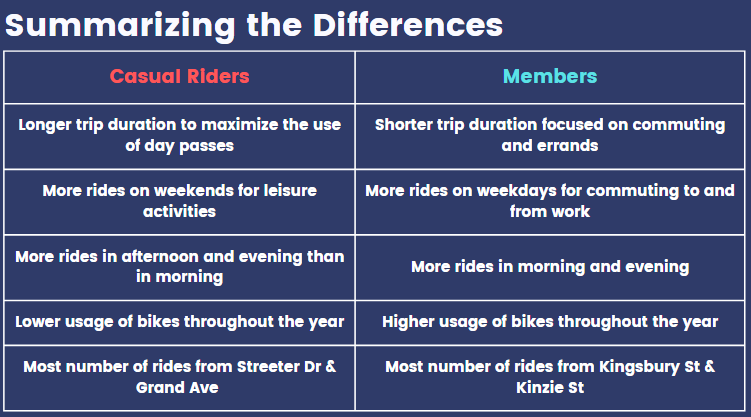

The recommendations are as follows:
The **casual riders with similar behaviour as a member** - using bikes for shorter durations, for commuting and errands and on weekdays following can be done to convert them to a member - 
1. Marketing Campaigns during morning and evening hours
2. Regional campaigns at top 10 stations used by Annual Members
3. Seasonal marketing campaign in spring and summer

For **casual riders who prefer leisure activities** -

1. A separate membership plan focused on - bike availibility for longer periods and weekends at different pricing than regular annual membership plan needs to be included.
2. Weekend only plans where bikes are available only on Friday, Saturday and Sunday throughout the year.

# Act Phase
In this phase the stakeholders involved - Lily Moreno (Director of Marketing) can take actions based on the recommendations shared in the share phase.